## Random bidding strategy 2: standard dev. ranges as bid price boundaries

In [14]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import random

#Import validation and testing data sets
rtb_train = pd.read_csv("train.csv")
rtb_train_cropped = rtb_train[['payprice','click','bidprice']]
rtb_validation = pd.read_csv("validation.csv")
rtb_validation_cropped = rtb_validation[['payprice','click']]

In [15]:
#Determine bid prices boundaries with Standard deviation intervalls
meanPayPrice = rtb_validation_cropped['payprice'].mean()
payPriceStd = rtb_validation_cropped['payprice'].std()
print(meanPayPrice)
print(payPriceStd)
maxPrice = (rtb_train_cropped.loc[:,"payprice"].max())
minPrice = (rtb_train_cropped.loc[:,"payprice"].min())


78.23400509994242
60.026062850969545


In [18]:
constantPrice = 0
bidPriceList = []
count = 0

#Determine upper bid price boundaries for the constant bid range
while (count < ((maxPrice-minPrice)/10)):
    constantPrice +=10
    bidPriceList.append(constantPrice)
    count = count +1
    
numberBids = []
wonBids = []
CTR = [] 
numberClicks = [] 
CPC = [] 
CPM = []
eCPC = []

#Repeating bidding in validation set j times
for j in range (0,len(bidPriceList)):
    budget = 6250
    bids = 0
    impressions = 0
    clicks = 0
    
    #Creates an array of random bid prices in the boundaries declared above
    randomBids = []
    for i in range(0,len(rtb_validation)):
        bid = random.randrange(minPrice,bidPriceList[j],1)
        randomBids.append(bid)
    
    rtb_validation['random_bids'] = randomBids
    
    for i in range(0,len(rtb_validation_cropped)):
        if budget > 0 and budget > (rtb_validation_cropped['payprice'].values[i]/1000):
            impressions += 1
            if (rtb_validation['random_bids'].values[i]/1000) > (rtb_validation_cropped['payprice'].values[i]/1000):
                bids += 1
                clicks += rtb_validation_cropped['click'].values[i]
                budget = budget - (rtb_validation_cropped['payprice'].values[i]/1000)
        else: 
            print("Budget is spent!")
            break
    ctr = (clicks/impressions)*100    
    cpm = 6250/impressions
    cpc = 6250/clicks
        #Output for the alrogithm
    print("Output")
    print(bidPriceList[j])
    numberBids.append(impressions)
    print(numberBids)
    wonBids.append(bids)
    print(wonBids)
    CTR.append(ctr)
    print(CTR)
    numberClicks.append(clicks)
    print(numberClicks)
    CPC.append(cpc)
    print(CPC)
    CPM.append(cpm)
    print(CPM)

Output
10
[303925]
[4556]
[0.00032902854322612487]
[1]
[6250.0]
[0.020564283951632803]
Output
20
[303925, 303925]
[4556, 13789]
[0.00032902854322612487, 0.0009870856296783747]
[1, 3]
[6250.0, 2083.3333333333335]
[0.020564283951632803, 0.020564283951632803]
Output
30
[303925, 303925, 303925]
[4556, 13789, 27632]
[0.00032902854322612487, 0.0009870856296783747, 0.002303199802582874]
[1, 3, 7]
[6250.0, 2083.3333333333335, 892.8571428571429]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
40
[303925, 303925, 303925, 303925]
[4556, 13789, 27632, 39877]
[0.00032902854322612487, 0.0009870856296783747, 0.002303199802582874, 0.002961256889035124]
[1, 3, 7, 9]
[6250.0, 2083.3333333333335, 892.8571428571429, 694.4444444444445]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
50
[303925, 303925, 303925, 303925, 303925]
[4556, 13789, 27632, 39877, 50769]
[0.00032902854322612487, 0.0009870856296783747, 0.002303199802582874, 0.00

Budget is spent!
Output
150
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 288815, 266879]
[4556, 13789, 27632, 39877, 50769, 62849, 74385, 87777, 100766, 113047, 124234, 133685, 142499, 142921, 138452]
[0.00032902854322612487, 0.0009870856296783747, 0.002303199802582874, 0.002961256889035124, 0.003948342518713499, 0.007238627950974747, 0.00888377066710537, 0.008225713580653122, 0.01217405609936662, 0.01546434153162787, 0.017109484247758492, 0.02303199802582874, 0.02237394093937649, 0.024236968301507886, 0.02473030849186335]
[1, 3, 7, 9, 12, 22, 27, 25, 37, 47, 52, 70, 68, 70, 66]
[6250.0, 2083.3333333333335, 892.8571428571429, 694.4444444444445, 520.8333333333334, 284.09090909090907, 231.4814814814815, 250.0, 168.9189189189189, 132.9787234042553, 120.1923076923077, 89.28571428571429, 91.91176470588235, 89.28571428571429, 94.6969696969697]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0

Budget is spent!
Output
210
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 288815, 266879, 247817, 231943, 217947, 205851, 195532, 186329]
[4556, 13789, 27632, 39877, 50769, 62849, 74385, 87777, 100766, 113047, 124234, 133685, 142499, 142921, 138452, 133911, 130117, 126602, 123139, 120248, 117510]
[0.00032902854322612487, 0.0009870856296783747, 0.002303199802582874, 0.002961256889035124, 0.003948342518713499, 0.007238627950974747, 0.00888377066710537, 0.008225713580653122, 0.01217405609936662, 0.01546434153162787, 0.017109484247758492, 0.02303199802582874, 0.02237394093937649, 0.024236968301507886, 0.02473030849186335, 0.026632555474402485, 0.02845526702681262, 0.031200245931350283, 0.030604660652607956, 0.03324264059079844, 0.030054366201718467]
[1, 3, 7, 9, 12, 22, 27, 25, 37, 47, 52, 70, 68, 70, 66, 66, 66, 68, 63, 65, 56]
[6250.0, 2083.3333333333335, 892.8571428571429, 694.4444444444445, 520.8333333333334, 284.09090909090907

Budget is spent!
Output
260
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 288815, 266879, 247817, 231943, 217947, 205851, 195532, 186329, 178592, 171080, 164246, 158340, 153752]
[4556, 13789, 27632, 39877, 50769, 62849, 74385, 87777, 100766, 113047, 124234, 133685, 142499, 142921, 138452, 133911, 130117, 126602, 123139, 120248, 117510, 115160, 112757, 110342, 108242, 106894]
[0.00032902854322612487, 0.0009870856296783747, 0.002303199802582874, 0.002961256889035124, 0.003948342518713499, 0.007238627950974747, 0.00888377066710537, 0.008225713580653122, 0.01217405609936662, 0.01546434153162787, 0.017109484247758492, 0.02303199802582874, 0.02237394093937649, 0.024236968301507886, 0.02473030849186335, 0.026632555474402485, 0.02845526702681262, 0.031200245931350283, 0.030604660652607956, 0.03324264059079844, 0.030054366201718467, 0.030796452248700947, 0.03507131166705635, 0.038965941331904584, 0.03663003663003663, 0.03772308652895572

Budget is spent!
Output
300
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 288815, 266879, 247817, 231943, 217947, 205851, 195532, 186329, 178592, 171080, 164246, 158340, 153752, 148623, 145177, 140830, 137588]
[4556, 13789, 27632, 39877, 50769, 62849, 74385, 87777, 100766, 113047, 124234, 133685, 142499, 142921, 138452, 133911, 130117, 126602, 123139, 120248, 117510, 115160, 112757, 110342, 108242, 106894, 105092, 103890, 102319, 101046]
[0.00032902854322612487, 0.0009870856296783747, 0.002303199802582874, 0.002961256889035124, 0.003948342518713499, 0.007238627950974747, 0.00888377066710537, 0.008225713580653122, 0.01217405609936662, 0.01546434153162787, 0.017109484247758492, 0.02303199802582874, 0.02237394093937649, 0.024236968301507886, 0.02473030849186335, 0.026632555474402485, 0.02845526702681262, 0.031200245931350283, 0.030604660652607956, 0.03324264059079844, 0.030054366201718467, 0.030796452248700947, 0.03507131166705635

In [19]:
#Store summary statistics in a dataframe and plot graphs for each of them
summaryStatistics = pd.DataFrame({
    'bidPrice': bidPriceList,
    'numberBids': numberBids,
    'wonBids': wonBids,
    'CTR': CTR,
    'Clicks': numberClicks,
    'eCPC': CPC, 
    'CPM': CPM,
})
print(summaryStatistics)

         CPM       CTR  Clicks  bidPrice         eCPC  numberBids  wonBids
0   0.020564  0.000329       1        10  6250.000000      303925     4556
1   0.020564  0.000987       3        20  2083.333333      303925    13789
2   0.020564  0.002303       7        30   892.857143      303925    27632
3   0.020564  0.002961       9        40   694.444444      303925    39877
4   0.020564  0.003948      12        50   520.833333      303925    50769
5   0.020564  0.007239      22        60   284.090909      303925    62849
6   0.020564  0.008884      27        70   231.481481      303925    74385
7   0.020564  0.008226      25        80   250.000000      303925    87777
8   0.020564  0.012174      37        90   168.918919      303925   100766
9   0.020564  0.015464      47       100   132.978723      303925   113047
10  0.020564  0.017109      52       110   120.192308      303925   124234
11  0.020564  0.023032      70       120    89.285714      303925   133685
12  0.020564  0.022374   

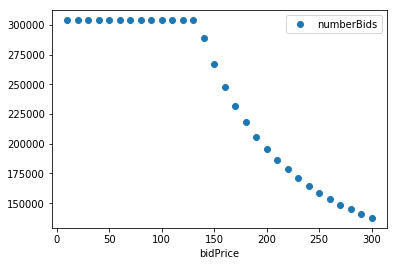

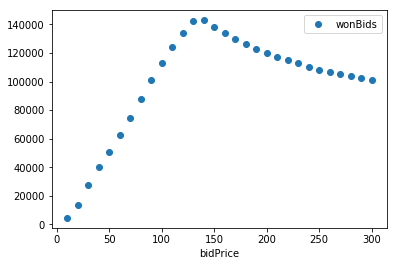

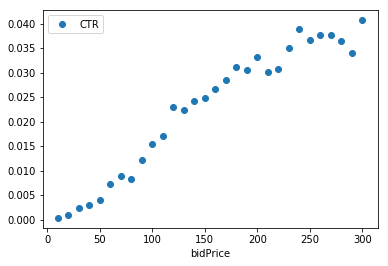

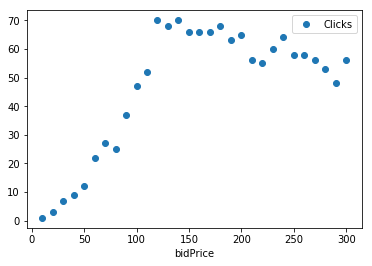

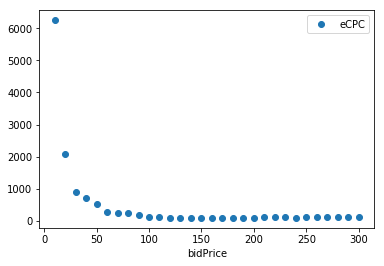

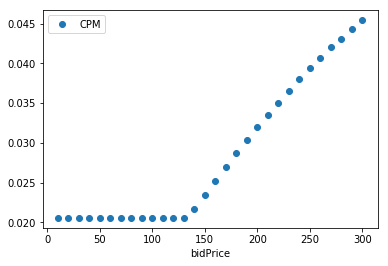

In [20]:
summaryStatistics.plot(x='bidPrice', y='numberBids', style='o'); summaryStatistics.plot(x='bidPrice', y='wonBids', style='o')
summaryStatistics.plot(x='bidPrice', y='CTR', style='o')
summaryStatistics.plot(x='bidPrice', y='Clicks', style='o')
summaryStatistics.plot(x='bidPrice', y='eCPC', style='o')
summaryStatistics.plot(x='bidPrice', y='CPM', style='o')

In [ ]:
# VALIDATION SET - Budget of 6250
# plt.figure()
fig, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )


#Clicks - 1
ax1= summaryStatistics.plot(ax=axes[0,0],x='Constant bid price', y='Clicks',color ='red', alpha = 0.8)
ax1.set_ylabel('# of Clicks')
ax1.set_xlabel('Constant Bid Price [Fen]')
ax1.set_xticks(np.arange(0,305,50))
ax1.set_yticks(np.arange(0,100,10))
ax1.set_ylim(top=80)
# ymax = summaryStatistics['Clicks'].max()
# xpos = numberClicks.index(ymax)
# xmax = summaryStatistics.iloc[xpos]['Constant bid price']
# ax1.annotate('local max', xy=(80,68), xytext=(80,73),
# arrowprops=dict(facecolor='black', shrink=0.05),)

#Impressions won - 2
ax2= summaryStatistics.plot(ax=axes[0,1],x='Constant bid price', y='CPM',color ='red', alpha = 0.8)
ax2.set_ylabel('CPM [Fen]')
ax2.set_xlabel('Constant Bid Price [Fen]')
ax2.set_xticks(np.arange(0,305,50))
ax2.set_yticks(np.arange(0,0.1,0.01))
ax2.set_ylim(top=0.08)

#Win ratio - 3
ax3= summaryStatistics.plot(ax=axes[0,2],x='Constant bid price', y='CTR',color ='red', alpha = 0.8)
ax3.set_ylabel('CTR [in %]')
ax3.set_xlabel('Constant Bid Price [Fen]')
ax3.set_xticks(np.arange(0,305,50))
ax3.set_yticks(np.arange(0,0.1,0.01))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=0.08)

#CTR -  4
ax4= summaryStatistics.plot(ax=axes[1,0],x='Constant bid price', y='wonBids',color ='red', alpha = 0.8)
ax4.set_ylabel('# of Bids won')
ax4.set_xlabel('Constant Bid Price [in Fen]')
ax4.set_xticks(np.arange(0,305,50))
ax4.set_yticks(np.arange(0,160000,20000))
ax4.set_ylim(top=160000)

#CPM - 5
ax5= summaryStatistics.plot(ax=axes[1,1],x='Constant bid price', y='numberBids',color ='red', alpha = 0.8)
ax5.set_ylabel('# of Bids')
ax5.set_xlabel('Constant Bid Price [in Fen]')
ax5.set_xticks(np.arange(0,305,50))
ax5.set_yticks(np.arange(0,1000000,50000))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=350000)

#eCPC - 6
ax6= summaryStatistics.plot(ax=axes[1,2],x='Constant bid price', y='eCPC',color ='red', alpha = 0.8)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Bid Value')
ax6.set_xticks(np.arange(0,305,50))
ax6.set_yticks(np.arange(0,1800,200))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=1600)

plt.tight_layout(h_pad = 0.2)

#Save image
plt.savefig('numberBids.pdf',bbox_inches='tight')